# Data Science Challenge

In [1]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

# Importing Libraries

In [2]:
#Libraries

import numpy as np
import math
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt


# Scikit-learn for ML prediction and modelling

import sklearn
from sklearn.metrics import mean_squared_error, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from os import path
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [3]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [4]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


# Checking Column Values

In [5]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

# Statistical Overview of the given data set (quantiles, count, mean, std)

In [6]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


# Exploring Data Types

In [7]:
#Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
id                     2870 non-null int64
region                 2870 non-null object
latitude               2870 non-null float64
longitude              2870 non-null float64
accommodation_type     2870 non-null object
cost                   2870 non-null int64
minimum_nights         2870 non-null int64
number_of_reviews      2870 non-null int64
reviews_per_month      2194 non-null float64
owner_id               2870 non-null int64
owned_hotels           2870 non-null int64
yearly_availability    2870 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


# Estimating the total number of missing values

In [8]:
data.isna().sum()

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

# Filling the missing values with zeros

In [9]:
data.fillna(0,inplace=True)



In [10]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.00,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [11]:
data.shape


(2870, 12)

In [12]:
data.nunique()

id                     2870
region                    5
latitude               2647
longitude              2550
accommodation_type        3
cost                    330
minimum_nights           53
number_of_reviews       160
reviews_per_month       420
owner_id               2371
owned_hotels             40
yearly_availability       2
dtype: int64

# When I explored the data, it made sense to add 2 additional features namely, minimum_cost and distance_jfk. 

## minimum_cost is the product of minimum_nights and cost

In [13]:
data['minimum_cost']=data['minimum_nights']*data['cost']

In [14]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,minimum_cost
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0,850
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0,195
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,19923341,1,1,85
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.00,200380610,65,1,6300
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1,225


## Created a function to calculate the distance between two places given their coordinates using Haversine formula

In [15]:
def distanceCalculator (lat1,long1,lat2,long2):

    R = 6371 #Earth radius
    phi1 = lat1*(np.pi/180)
    phi2 = lat2*(np.pi/180)
    lambda1 = long1*(np.pi/180)
    lambda2 = long2*(np.pi/180)

    deltaPhi = phi2 - phi1
    deltaLambda = lambda2 - lambda1

    #Haversine Formula

    a = (np.sin(deltaPhi/2))**2 + np.cos(phi1)*np.cos(phi2)*(np.sin(deltaLambda/2))**2
    c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))

    d = R*c #in kms
   
    return d


## Created a feature called distance_jfk by taking the distance from JFK Airport. Because the distance from the airport might play a role in the yearly_availability.

In [16]:
lat1= 40.644633 # Latitude of JFK Airport
long1= -73.778653 # Longitude of JFK Airport

data['distance_jfk']=distanceCalculator(lat1,long1,data['latitude'],data['longitude'])

In [17]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,minimum_cost,distance_jfk
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0,850,20.733294
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0,195,14.482011
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,19923341,1,1,85,15.918921
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.00,200380610,65,1,6300,19.936890
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1,225,24.463704


# Outlier Removal of values beyond 2 std from the mean

In [18]:
features = ['latitude', 'longitude', 'cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'minimum_cost', 'distance_jfk']

for entry in features:
    data[entry]=data[entry][(data[entry] > (data[entry].mean()-2*data[entry].std())) & (data[entry] <=(data[entry].mean()+ 2*data[entry].std()))]
    
    
    
    

In [19]:
data.isna().sum()
data.dropna(inplace=True)

In [20]:
data.shape


(2268, 14)

In [21]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,minimum_cost,distance_jfk
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170.0,5.0,7.0,0.56,929983,1,0,850.0,20.733294
3,34305,Manhattan,40.73863,-73.98002,Private room,210.0,30.0,0.0,0.00,200380610,65,1,6300.0,19.936890
4,444,Manhattan,40.82426,-73.94630,Shared room,75.0,3.0,38.0,0.42,745069,3,1,225.0,24.463704
5,30553,Manhattan,40.73976,-74.00953,Private room,200.0,10.0,11.0,0.76,11243113,1,1,2000.0,22.153704
6,30500,Brooklyn,40.67913,-73.98015,Entire home/apt,95.0,1.0,8.0,0.52,1746811,2,0,95.0,17.423539


# Encoding the categorical variables

In [22]:
data['accommodation_type']=data['accommodation_type'].astype('category').cat.codes
data['region']=data['region'].astype('category').cat.codes

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

No handles with labels found to put in legend.


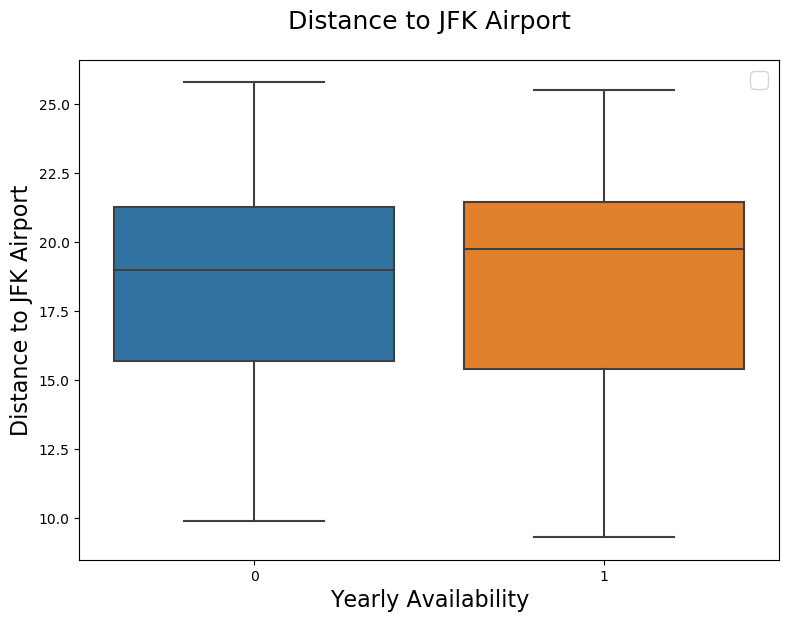

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(7,5), dpi=100)
fig.suptitle("Distance to JFK Airport", y=1.1, fontsize=18)

sns.boxplot(y='distance_jfk', x='yearly_availability', data=data)
axes.set_xlabel("Yearly Availability", fontsize=16)
axes.set_ylabel("Distance to JFK Airport", fontsize=16)
axes.legend(fontsize=16)

fig.subplots_adjust(left=0., bottom=0., right=1., top=1.0)
# plt.savefig('Fig2_median_overspend_bar.png', dpi=300, bbox_inches = 'tight')
plt.show()

No handles with labels found to put in legend.


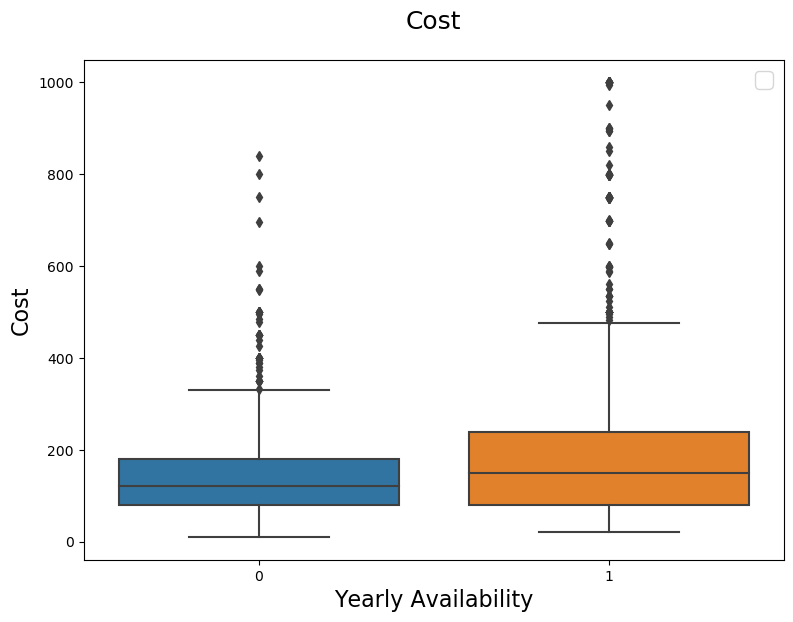

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(7,5), dpi=100)
fig.suptitle("Cost", y=1.1, fontsize=18)

sns.boxplot(y='cost', x='yearly_availability', data=data)
axes.set_xlabel("Yearly Availability", fontsize=16)
axes.set_ylabel("Cost", fontsize=16)
axes.legend(fontsize=16)

fig.subplots_adjust(left=0., bottom=0., right=1., top=1.0)
# plt.savefig('Fig2_median_overspend_bar.png', dpi=300, bbox_inches = 'tight')
plt.show()

No handles with labels found to put in legend.


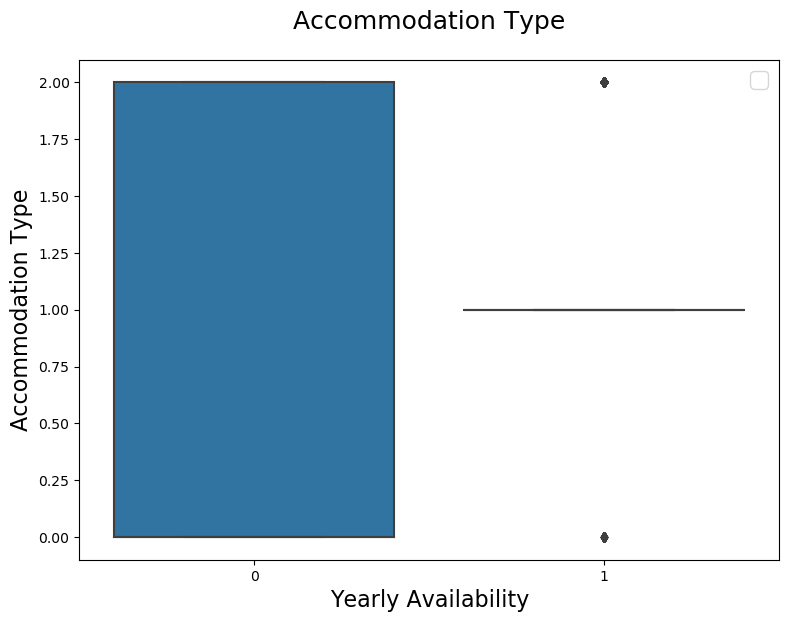

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(7,5), dpi=100)
fig.suptitle("Accommodation Type", y=1.1, fontsize=18)

sns.boxplot(y='accommodation_type', x='yearly_availability', data=data)
axes.set_xlabel("Yearly Availability", fontsize=16)
axes.set_ylabel("Accommodation Type", fontsize=16)
axes.legend(fontsize=16)

fig.subplots_adjust(left=0., bottom=0., right=1., top=1.0)
# plt.savefig('Fig2_median_overspend_bar.png', dpi=300, bbox_inches = 'tight')
plt.show()

No handles with labels found to put in legend.


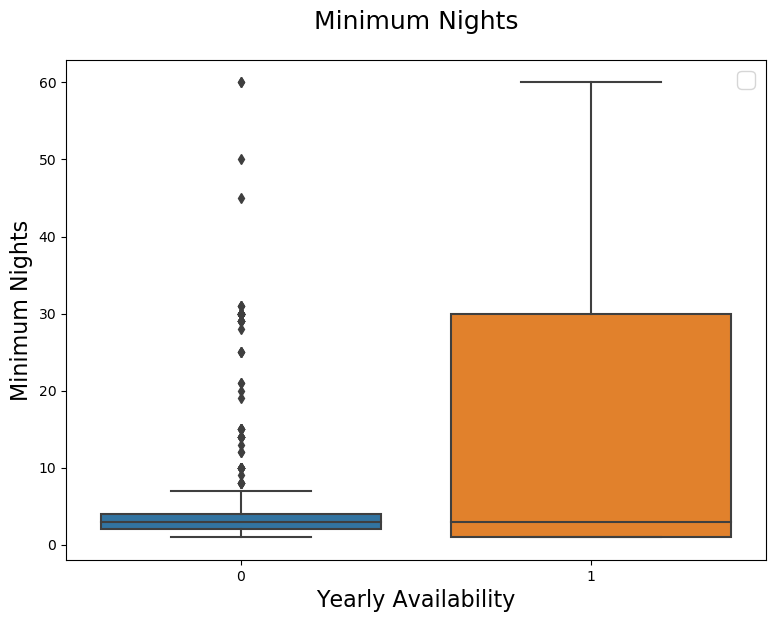

In [26]:
fig, axes = plt.subplots(1, 1, figsize=(7,5), dpi=100)
fig.suptitle("Minimum Nights", y=1.1, fontsize=18)

sns.boxplot(y='minimum_nights', x='yearly_availability', data=data)
axes.set_xlabel("Yearly Availability", fontsize=16)
axes.set_ylabel("Minimum Nights", fontsize=16)
axes.legend(fontsize=16)

fig.subplots_adjust(left=0., bottom=0., right=1., top=1.0)
# plt.savefig('Fig2_median_overspend_bar.png', dpi=300, bbox_inches = 'tight')
plt.show()

No handles with labels found to put in legend.


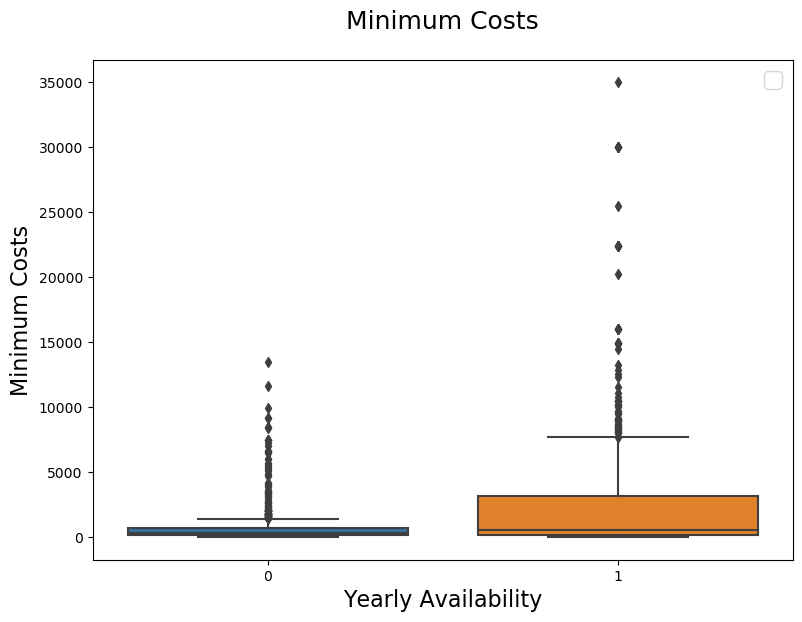

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(7,5), dpi=100)
fig.suptitle("Minimum Costs", y=1.1, fontsize=18)

sns.boxplot(y='minimum_cost', x='yearly_availability', data=data)
axes.set_xlabel("Yearly Availability", fontsize=16)
axes.set_ylabel("Minimum Costs", fontsize=16)
axes.legend(fontsize=16)

fig.subplots_adjust(left=0., bottom=0., right=1., top=1.0)
# plt.savefig('Fig2_median_overspend_bar.png', dpi=300, bbox_inches = 'tight')
plt.show()

No handles with labels found to put in legend.


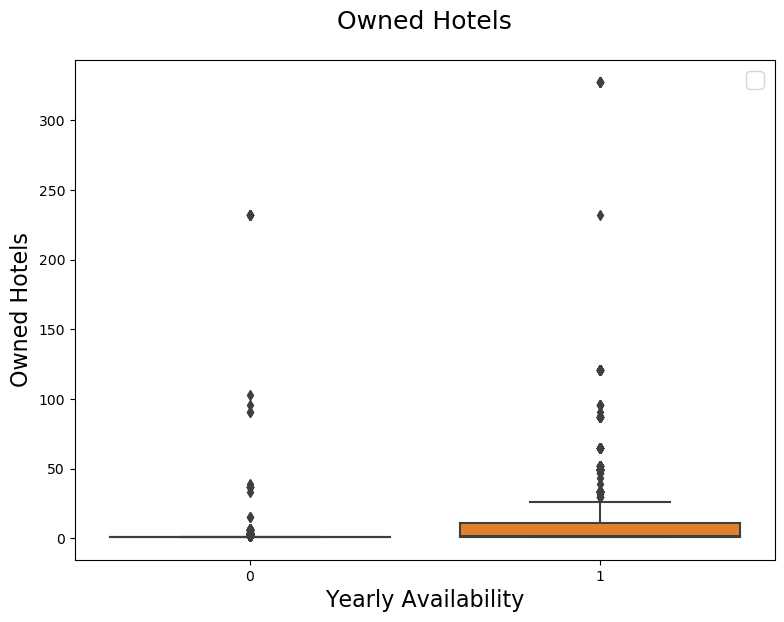

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(7,5), dpi=100)
fig.suptitle("Owned Hotels", y=1.1, fontsize=18)

sns.boxplot(y='owned_hotels', x='yearly_availability', data=data)
axes.set_xlabel("Yearly Availability", fontsize=16)
axes.set_ylabel("Owned Hotels", fontsize=16)
axes.legend(fontsize=16)

fig.subplots_adjust(left=0., bottom=0., right=1., top=1.0)
# plt.savefig('Fig2_median_overspend_bar.png', dpi=300, bbox_inches = 'tight')
plt.show()

No handles with labels found to put in legend.


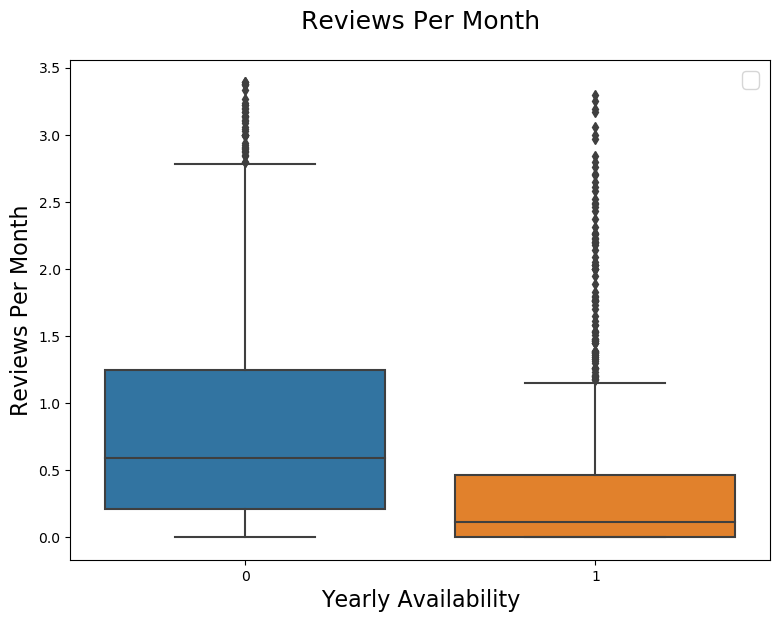

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(7,5), dpi=100)
fig.suptitle("Reviews Per Month", y=1.1, fontsize=18)

sns.boxplot(y='reviews_per_month', x='yearly_availability', data=data)
axes.set_xlabel("Yearly Availability", fontsize=16)
axes.set_ylabel("Reviews Per Month", fontsize=16)
axes.legend(fontsize=16)

fig.subplots_adjust(left=0., bottom=0., right=1., top=1.0)
# plt.savefig('Fig2_median_overspend_bar.png', dpi=300, bbox_inches = 'tight')
plt.show()

No handles with labels found to put in legend.


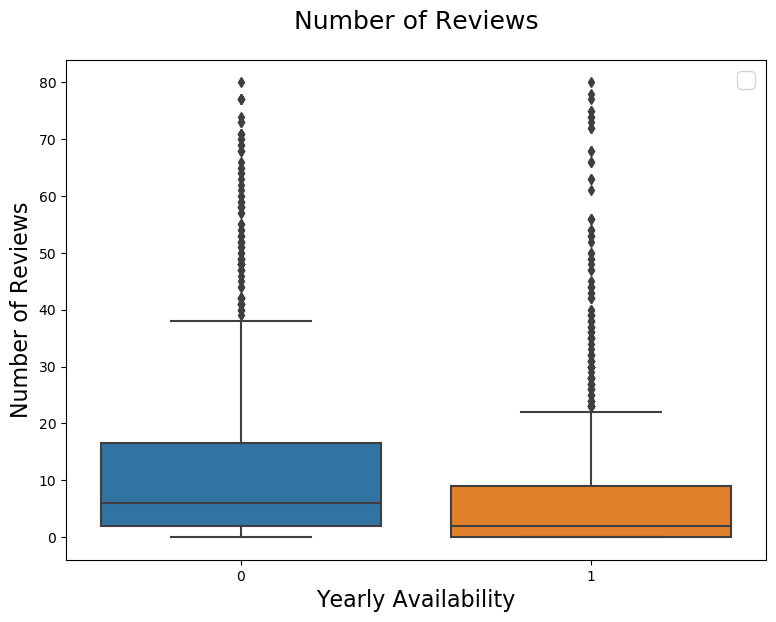

In [30]:
fig, axes = plt.subplots(1, 1, figsize=(7,5), dpi=100)
fig.suptitle("Number of Reviews", y=1.1, fontsize=18)

sns.boxplot(y='number_of_reviews', x='yearly_availability', data=data)
axes.set_xlabel("Yearly Availability", fontsize=16)
axes.set_ylabel("Number of Reviews", fontsize=16)
axes.legend(fontsize=16)

fig.subplots_adjust(left=0., bottom=0., right=1., top=1.0)
# plt.savefig('Fig2_median_overspend_bar.png', dpi=300, bbox_inches = 'tight')
plt.show()

# Checking the class balance

Available hotels in the data : 48.36860670194004
Unavailable hotel in the data : 51.63139329805997


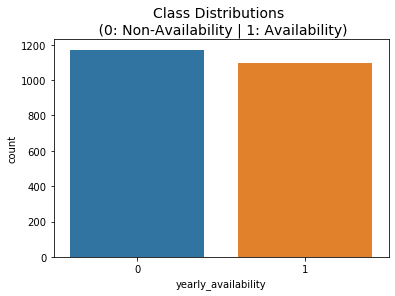

In [31]:
# Class balance
import matplotlib.pyplot as plt
model_df=data
print('Available hotels in the data :',len(model_df[model_df['yearly_availability']==1])/len(model_df)*100)
print('Unavailable hotel in the data :',len(model_df[model_df['yearly_availability']==0])/len(model_df)*100)
# sns.set_theme(style="darkgrid")
g=sns.countplot(data=model_df, x='yearly_availability')
plt.title('Class Distributions \n (0: Non-Availability | 1: Availability)',fontsize=14)
plt.show()
# Class imbalance needs to be taken care before applying model

# Splitting the training data to train and validation sets

In [32]:
X = model_df.drop(columns = ['yearly_availability']) # 'user_id'
y = model_df['yearly_availability']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=42)
print('X shape -', X_train.shape)
print('y shape -', y_train.shape)

X shape - (1814, 13)
y shape - (1814,)


# Baseline Model - Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_log = clf_log.predict(X_valid)

In [34]:
print("Accuracy (in %):", clf_log.score(X_valid, y_valid)*100)
print('F1 score', f1_score(y_valid, y_pred_log))


Accuracy (in %): 70.48458149779736
F1 score 0.6778846153846153


# Optimized Model with improved performance - Random Forest Classifier

In [35]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
print("Accuracy (in %):", clf.score(X_valid, y_valid)*100)
# y_pred = clf.predict(X_valid)
y_pred = (clf.predict_proba(X_valid)[:,1] >= 0.5).astype(bool)
print('F1 score', f1_score(y_valid, y_pred))

Accuracy (in %): 92.73127753303964
F1 score 0.9281045751633987


# Checking the feature importance



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


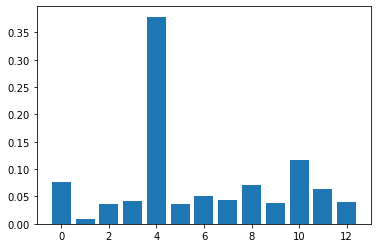

In [36]:
importance=clf.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# The most important features are: accommodation_type and owned_hotels, in that order.

# Reading test_data

In [37]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [38]:
test_data['accommodation_type']=test_data['accommodation_type'].astype('category').cat.codes
test_data['region']=test_data['region'].astype('category').cat.codes

In [39]:
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,1,40.70912,-73.94513,2,135,2,22,0.66,4360212,1
1,36301,1,40.57646,-73.96641,0,69,2,8,0.90,181356989,2
2,40566,2,40.76616,-73.98228,1,225,30,0,NaN,13773574,12
3,33694,2,40.77668,-73.94587,2,125,30,9,0.82,6788748,1
4,28873,2,40.80279,-73.94450,0,43,1,13,0.72,105061915,2


# Filling NaN with 0

In [40]:
test_data.fillna(0, inplace=True)

In [41]:
test_data.isna().sum()

id                    0
region                0
latitude              0
longitude             0
accommodation_type    0
cost                  0
minimum_nights        0
number_of_reviews     0
reviews_per_month     0
owner_id              0
owned_hotels          0
dtype: int64

# Applying the same transformations used before on the test_data

In [42]:
X_test = test_data

In [43]:
X_test['minimum_cost']=X_test['minimum_nights']*X_test['cost']

In [44]:
X_test['distance_jfk']=distanceCalculator(lat1,long1,X_test['latitude'],X_test['longitude'])

# Predicting on the test dataset using your optimized model

In [45]:
y_pred = (clf.predict_proba(X_test)[:,1] >= 0.5).astype(int)


> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [46]:
ids = np.array(test_data['id'])
y_pred = np.array(y_pred)
d = {'id':ids,'yearly_availability':y_pred}

In [47]:
submission_df = pd.DataFrame(data=d)

In [48]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---